In [1]:
from SimDataDB import SimDataDB
import WaveExperiments
import importlib
importlib.reload(WaveExperiments)
from WaveExperiments import *
from WaveAnalysisUtil import *

In [2]:
sdb = SimDataDB('results/wave_2.sqlite')

In [3]:
Nxs = sdb.Query('select distinct Nx from wave')

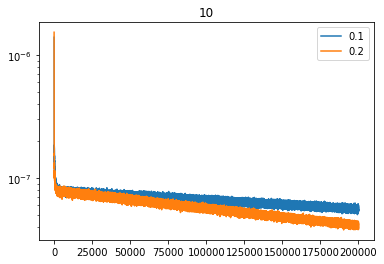

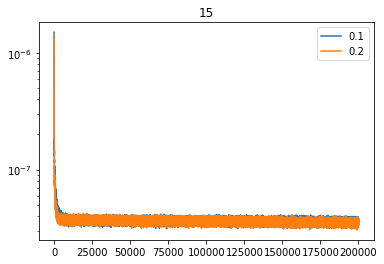

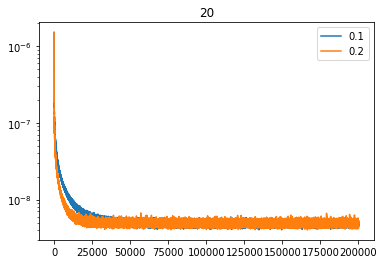

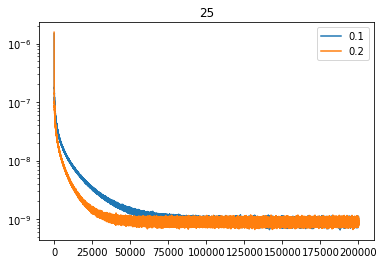

In [18]:
for Nx, in Nxs:
    res = sdb.Query(f'select learning_rate,experiment from wave where meaning="ode_mr" and Nx={Nx}')
    for t,y in res:
        plt.semilogy(y.losses,label=t)
    plt.title(Nx)
    plt.legend()
    plt.show()

[  81. -162.   81.]
[  -6.75  108.   -202.5   108.     -6.75]
[   0.9   -12.15  121.5  -220.5   121.5   -12.15    0.9 ]
[ 196. -392.  196.]
[ -16.33333333  261.33333333 -490.          261.33333333  -16.33333333]
[   2.17777778  -29.4         294.         -533.55555556  294.
  -29.4           2.17777778]
[ 361. -722.  361.]
[ -30.08333333  481.33333333 -902.5         481.33333333  -30.08333333]
[   4.01111111  -54.15        541.5        -982.72222222  541.5
  -54.15          4.01111111]
[  576. -1152.   576.]
[  -48.   768. -1440.   768.   -48.]
[    6.4   -86.4   864.  -1568.    864.    -86.4     6.4]
Type doesn't support sorting
Type doesn't support sorting
Type doesn't support sorting


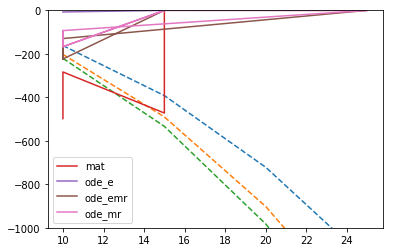

In [20]:
s3s,s5s,s7s = [],[],[]
for Nx, in Nxs:
    s3,s5,s7 = make_stencils(Nx)
    s3s.append(s3[1])
    s5s.append(s5[2])
    s7s.append(s7[3])
plt.plot(Nxs,s3s,'--')
plt.plot(Nxs,s5s,'--')
plt.plot(Nxs,s7s,'--')

meanings = sdb.Query('select distinct meaning from wave')
for meaning, in meanings:
    res = sdb.Query(f'select Nx,experiment from wave where meaning="{meaning}"')
    midpts = []
    for Nx,exp in res:
        off = 5
        exp.post()
        midpts.append(exp.all_lambdas[-1][10+off,off])
    plt.plot([Nx for Nx,exp in res],midpts,label=meaning)
plt.ylim(-1000,0)
plt.legend()
plt.show()


In [ ]:
for Nx,exp in res:
